# Exercise 5

## Problem 2: Visualize an interactive map (10 points)

Create a nice interactive map using the skills you leared in lesson 5: interactive maps using Folium (or some other suitable package - feel free to experiment!). Write your code into a notebook file (`.ipynb`) or a python script file (.py) and store the output map(s) in `.html` format under the `docs` folder.

**Topic of the map:**
- You can select the topic of the map freely.
- This map should not be only an interactive version of your submission for problem 1 ;). Create something new!
- Feel free to adapt examples provided in this course!

**Criteria:**
- The map should have multiple layers on it and/or present an output of (simple) data analysis (something beyond plotting raw data on a map).
- Consider [good cartographic practices](https://www.gislounge.com/ten-things-to-consider-when-making-a-map/)
- The map should demonstrate skills learned during lesson 5: interactive maps and throughout this course.
- Think about including additional interactive elements, such as popup text in the map.

**Output:**
- Remember to commit the code and input data (or at least a link to input data)
- Save your map(s) in .html format in the **`docs`** folder


In [1]:
# Import needed modules needed in this exercise
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import contextily as ctx

**DATA USED IN THIS EXERCISE:**

`Helsinki_Espoo_kaupunkipyöräasemat_2021.shp` 
- city bike stations located in Helsinki and Espoo, 2021
- retrieved from Helsinki Region Infoshare (https://hri.fi/data/en_GB/dataset/hsl-n-kaupunkipyoraasemat) 

`Helsinki_borders.shp` 
- border of Helsinki
- retrieved from course website  

In [2]:
# Read .shp file of citybike stations of Helsinki and Espoo as a geodataframe called bikes
fp = r'/home/jovyan/work/autogis/exercises/exercise-5-chtimmer/Helsinki_Espoo_kaupunkipyöräasemat_2021.shp'
bikes = gpd.read_file(fp)
# Read .shp file containing border of Helsinki as a geodataframe called helsinki
fp = r'/home/jovyan/work/autogis/exercises/exercise-5-chtimmer/Helsinki_borders.shp'
helsinki = gpd.read_file(fp)

# Check the bikes data
bikes.head()

,FID,ID,Nimi,Namn,Name,Osoite,Adress,Kaupunki,Stad,Operaattor,Kapasiteet,x,y,geometry
0,1,501,Hanasaari,Hanaholmen,Hanasaari,Hanasaarenranta 1,Hanaholmsstranden 1,Espoo,Esbo,CityBike Finland,10,24.840319,60.165820,POINT (24.84032 60.16582)
1,2,503,Keilalahti,Kägelviken,Keilalahti,Keilalahdentie 2,Kägelviksvägen 2,Espoo,Esbo,CityBike Finland,28,24.827467,60.171524,POINT (24.82747 60.17152)
2,3,505,Westendinasema,Westendstationen,Westendinasema,Westendintie 1,Westendvägen 1,Espoo,Esbo,CityBike Finland,16,24.805758,60.168266,POINT (24.80576 60.16827)
3,4,507,Golfpolku,Golfstigen,Golfpolku,Golfpolku 3,Golfstigen 3,Espoo,Esbo,CityBike Finland,16,24.796136,60.168143,POINT (24.79614 60.16814)
4,5,509,Revontulentie,Norrskensvägen,Revontulentie,Revontulentie 10,Norrskensvägen 10,Espoo,Esbo,CityBike Finland,30,24.802938,60.171551,POINT (24.80294 60.17155)


In [3]:
# Check crs for bikes
bikes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
# Check crs for helsinki
helsinki.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
# Make a backup copy of the bikes data with old crs
bikes_oldcrs = bikes.copy()
# Reproject the data to EPSG:3067
bikes = bikes.to_crs(epsg=3067)

In [6]:
# Check that the geometry column crs has changed
bikes.head()

,FID,ID,Nimi,Namn,Name,Osoite,Adress,Kaupunki,Stad,Operaattor,Kapasiteet,x,y,geometry
0,1,501,Hanasaari,Hanaholmen,Hanasaari,Hanasaarenranta 1,Hanaholmsstranden 1,Espoo,Esbo,CityBike Finland,10,24.840319,60.165820,POINT (380155.667 6671838.100)
1,2,503,Keilalahti,Kägelviken,Keilalahti,Keilalahdentie 2,Kägelviksvägen 2,Espoo,Esbo,CityBike Finland,28,24.827467,60.171524,POINT (379463.558 6672496.522)
2,3,505,Westendinasema,Westendstationen,Westendinasema,Westendintie 1,Westendvägen 1,Espoo,Esbo,CityBike Finland,16,24.805758,60.168266,POINT (378247.339 6672173.638)
3,4,507,Golfpolku,Golfstigen,Golfpolku,Golfpolku 3,Golfstigen 3,Espoo,Esbo,CityBike Finland,16,24.796136,60.168143,POINT (377713.116 6672177.725)
4,5,509,Revontulentie,Norrskensvägen,Revontulentie,Revontulentie 10,Norrskensvägen 10,Espoo,Esbo,CityBike Finland,30,24.802938,60.171551,POINT (378103.075 6672544.558)


In [7]:
# Define helsinki crs to EPSG:3067
helsinki = helsinki.to_crs(epsg=3067)
# Check crs
helsinki.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
# Check helsinki df
helsinki.head()

,GML_ID,NAMEFIN,NAMESWE,NATCODE,geometry
0,27517366,Helsinki,Helsingfors,091,"POLYGON ((399936.363 6684600.244, 399937.630 6..."


In [9]:
# Check that the bikes and helsinki crs are the same
helsinki.crs == bikes.crs

True

In [10]:
# Select only useful columns from the bikes df
bikes = bikes[['geometry', 'Kapasiteet', 'Nimi']]

In [11]:
# Create new variable 'bikes_hel' and use thw .within() function to select points in the bikes data that are located within the helsinki polygon
bikes_hel = bikes.within(helsinki.at[0, 'geometry'])
# Add the data using .loc() function
bikes_hel = bikes.loc[bikes_hel]
# Check the data
print(bikes_hel)

                           geometry  Kapasiteet                Nimi
110  POINT (386216.314 6670480.244)          30         Kaivopuisto
111  POINT (386585.221 6671095.050)          12     Laivasillankatu
112  POINT (385937.824 6670801.750)          16  Kapteeninpuistikko
113  POINT (385767.644 6671120.091)          14           Viiskulma
114  POINT (385452.414 6670791.413)          32           Sepänkatu
..                              ...         ...                 ...
452  POINT (380970.458 6671540.305)          16      Koivusaari (M)
453  POINT (383990.919 6670498.145)          16        Bermudankuja
454  POINT (387850.051 6674239.642)          20         Verkkosaari
455  POINT (387745.811 6673504.505)          14          Sompasaari
456  POINT (392431.569 6671299.700)          16              Jollas

[347 rows x 3 columns]


In [12]:
# Save the bikes_hel into a new shapefile called 'bikestations.shp'
fp = r'/home/jovyan/work/autogis/exercises/exercise-5-chtimmer/docs/bikestations.shp'
bikes_hel.to_file(fp)

In [13]:
# Change crs to the same as the interactive maps
bikes_hel_oldcrs = bikes_hel.copy()
bikes_hel = bikes_hel.to_crs(epsg=4326)
# Check crs
bikes_hel.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
# Import folium to create an interactive map
import folium
# Import MarkerCluster plugin from folium to create a cluster map
from folium.plugins import MarkerCluster

# Create interactive map base
clustermap = folium.Map(location=[60.20, 25.0], tiles = 'cartodbpositron', zoom_start=11, control_scale=True)

# Create coordination points for the bikes_hel df
bikes_hel["x"] = bikes_hel["geometry"].x
bikes_hel["y"] = bikes_hel["geometry"].y
# Create variable 'locations', use .zip() to create pairs from the coordination points and .list() to create a list from the pairs
locations = list(zip(bikes_hel["y"], bikes_hel["x"]))

# Create a folium marker cluster
marker_cluster = MarkerCluster(locations)

# Add marker cluster to map
marker_cluster.add_to(clustermap)

# Display the map
clustermap

In [15]:
# Save interactive map as .html file
outfp = r'/home/jovyan/work/autogis/exercises/exercise-5-chtimmer/docs/cluster_map.html'
clustermap.save(outfp)

In [16]:
# Import HeatMap plugin from folium
from folium.plugins import HeatMap

# Create a map instance 'heatmap'
heatmap = folium.Map(location=[60.20, 25.0], tiles = 'cartodbpositron', zoom_start=11, control_scale=True)

# Add HeatMap to map instance 'heatmap', use the 'locations' variable created previously as the data source
HeatMap(locations, blur=10, radius=25, min_opacity=0.6).add_to(heatmap)

# Display the map
heatmap

In [17]:
# Save interactive map as .html file
outfp = r'/home/jovyan/work/autogis/exercises/exercise-5-chtimmer/docs/heat_map.html'
heatmap.save(outfp)

### **STATIC MAP OF BICYCLE STATIONS**

I created an additional figure for the 'bikes.hel' data and visualized it according to the capacity of the bike stations.

In [18]:
# Set crs for helsinki and bikes_hel to EPSG:3857 (the Web Mercator projection used in the basemap while plotting figures)
helsinki = helsinki.to_crs(epsg=3857)
bikes_hel = bikes_hel.to_crs(epsg=3857)
# Check crs
print(helsinki.crs)
print(bikes_hel.crs)

epsg:3857
epsg:3857


(2760000.0, 2814000.0)

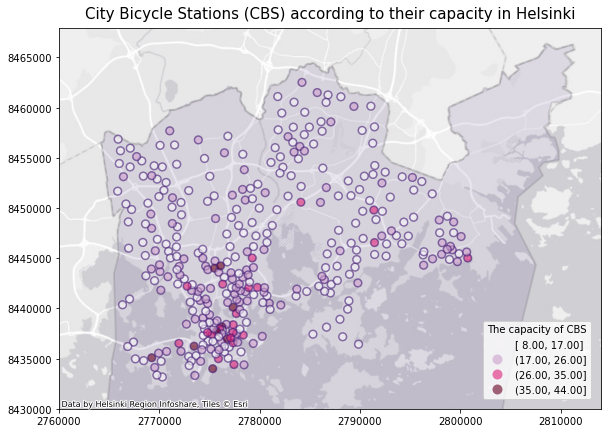

In [19]:
# Create a figure with multiple layers
fig, ax = plt.subplots(figsize=(21, 7))
# Plot the helsinki borders
h = helsinki.plot(ax=ax, linewidth=2, alpha=0.1, facecolor='#431d76', edgecolor='black')
# Plot the bikes_hel data, set column as 'Kapasiteet', set an appropriate scheme and number of classes (k=4)
b = bikes_hel.plot(ax=ax, column='Kapasiteet', cmap='PuRd', 
              scheme="Equal_Interval", k=4, legend=True, alpha=0.6, markersize=60,
             edgecolor='#431d76', linewidth=1.5)
# Remove 1e6 (scientific notation)
ax.ticklabel_format(style='plain') 
# Add credits
credits = "Data by Helsinki Region Infoshare, Tiles © Esri"
# Add basemap from Esri
ctx.add_basemap(ax, attribution=credits, source=ctx.providers.Esri.WorldGrayCanvas)
# Set the title of figure
ax.set_title("City Bicycle Stations (CBS) according to their capacity in Helsinki", fontsize=15, pad=10) 
# Set title for legend
ax.get_legend().set_title("The capacity of CBS")
ax.get_legend().set_bbox_to_anchor((0.99,0.245))
# Crop the figure
ax.set_ylim(8430000, 8467900)
ax.set_xlim(2760000, 2814000)

In [20]:
# Save figure, remove empty space around figure with bbox_inches and pad_inches
output_fig1 = r'/home/jovyan/work/autogis/exercises/exercise-5-chtimmer/docs/bike_stations.png'
fig.savefig(output_fig1, bbox_inches = 'tight', pad_inches = 0.2)

### Summary of the expected outputs

- At least 1 static map in `.png` format stored in the `docs`-folder (problem 1)
- At least 1 interactive map in `.html` format stored in the `docs`-folder (problem 2)
- All codes (`.ipynb` or `.py` -files) and input data (or links to input data) provided in this exercise-5 repository 
- Optional: Published maps at: `https://autoGIS-2021.github.io/exercise-5-YourGitHubUsername/filename*` containing online versions of your interactive and static maps (problem 3) 
- Optional: Links to the published maps stored in the [**docs/index.md -file**](docs/index.md) (problem 3)

For both maps, think a bit about the audience of the map, and pay attention to your cartographic choices. Check out [this blog post for further hints on creating good maps](https://www.gislounge.com/ten-things-to-consider-when-making-a-map/). 